### Stock Market Prediction And Forecasting Using Stacked LSTM

In [83]:
!pip install tensorflowjs==4.1

ERROR: Could not find a version that satisfies the requirement tensorflow<3,>=2.10.0 (from tensorflowjs) (from versions: none)
ERROR: No matching distribution found for tensorflow<3,>=2.10.0


In [84]:
# # test functions to check for tensorflow
# # !source ~/miniconda/bin/activate

# import tensorflow as tf

# cifar = tf.keras.datasets.cifar100
# (x_train, y_train), (x_test, y_test) = cifar.load_data()
# model = tf.keras.applications.ResNet50(
#     include_top=True,
#     weights=None,
#     input_shape=(32, 32, 3),
#     classes=100,)

# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
# model.fit(x_train, y_train, epochs=5, batch_size=64)

In [85]:
### Keras and Tensorflow >2.0

In [86]:
### Data Collection
import pandas_datareader as pdr
import numpy as np
import pandas as pd

In [87]:
df=pd.read_csv('AAPL.csv')

In [88]:
df.head()


,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [89]:
df[-30:]

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1228,1228,AAPL,2020-04-13 00:00:00+00:00,273.25,273.7000,265.8300,268.31,32755731,272.529418,272.978231,265.128985,267.602445,32755731,0.00,1.0
1229,1229,AAPL,2020-04-14 00:00:00+00:00,287.05,288.2500,278.0500,280.00,48748672,286.293026,287.489862,277.316760,279.261618,48748672,0.00,1.0
1230,1230,AAPL,2020-04-15 00:00:00+00:00,284.43,286.3300,280.6300,282.40,32788641,283.679935,285.574925,279.889956,281.655289,32788641,0.00,1.0
1231,1231,AAPL,2020-04-16 00:00:00+00:00,286.69,288.1975,282.3502,287.38,39281290,285.933976,287.437500,281.605620,286.622156,39281290,0.00,1.0
1232,1232,AAPL,2020-04-17 00:00:00+00:00,282.80,286.9450,276.8600,284.69,53812478,282.054234,286.188303,276.129898,283.939250,53812478,0.00,1.0
1233,1233,AAPL,2020-04-20 00:00:00+00:00,276.93,281.6800,276.8500,277.95,32503750,276.199713,280.937187,276.119924,277.217024,32503750,0.00,1.0
1234,1234,AAPL,2020-04-21 00:00:00+00:00,268.37,277.2500,265.4300,276.28,45247893,267.662287,276.518870,264.730040,275.551428,45247893,0.00,1.0
1235,1235,AAPL,2020-04-22 00:00:00+00:00,276.10,277.9000,272.2000,273.61,29264342,275.371902,277.167155,271.482187,272.888469,29264342,0.00,1.0
1236,1236,AAPL,2020-04-23 00:00:00+00:00,275.03,281.7500,274.8700,275.87,31203582,274.304724,281.007003,274.145146,275.142509,31203582,0.00,1.0
1237,1237,AAPL,2020-04-24 00:00:00+00:00,282.97,283.0100,277.0000,277.20,31627183,282.223785,282.263680,276.269529,276.469001,31627183,0.00,1.0


In [90]:
close_prices=df.reset_index()['close']

In [91]:
close_prices

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

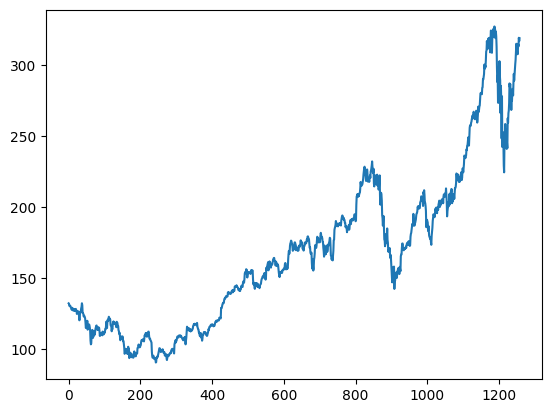

In [92]:
import matplotlib.pyplot as plt
plt.plot(close_prices)

# Scaling and Normalization

In [93]:
close_prices

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [94]:
# def mean_norm(df, labels=[]):
#   scale_columns = None

#   if (len(labels) > 1):
#     scale_columns = df[labels]
#     scale_columns = (scale_columns-scale_columns.mean())/scale_columns.std()
#   else:
#     scale_columns = df
#     scale_columns = (scale_columns-scale_columns.mean())/scale_columns.std()
#     # print(scale_columns.head())
#   return (scale_columns)

# # def invert_mean(df, labels=[]):
# #     scale_columns = None

# #   if (len(labels) > 1):
# #     scale_columns = df[labels]
# #     scale_columns = (scale_columns-scale_columns.mean())/scale_columns.std()
# #   else:
# #     scale_columns = df
# #     scale_columns = (scale_columns-scale_columns.mean())/scale_columns.std()
# #     # print(scale_columns.head())
# #   return (scale_columns)

# def scale(df, labels=[]):
#   scale_columns = None

#   if (len(labels) > 1):
#     scale_columns = df[labels]
#     scale_columns = (scale_columns-scale_columns.min())/(scale_columns.max()-scale_columns.min())
#   else:
#     scale_columns = df
#     scale_columns = (scale_columns-scale_columns.min())/(scale_columns.max()-scale_columns.min())
#     # print(scale_columns.head())
#   return (scale_columns)  

# # def invert_scale(df, maxp, minp):
# #   scale_columns = None

# #   if (len(labels) > 1):
# #     scale_columns = df[labels]
# #     scale_columns = scale_columns * (maxp-minp) + minp
# #   else:
# #     scale_columns = df
# #     # print(scale_columns.head())
# #   return (scale_columns)  

# maxp = close_prices.max()
# minp = close_prices.min()


from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
close=scaler.fit_transform(np.array(close_prices).reshape(-1,1))
close.shape

(1258, 1)

In [95]:
print(close)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [96]:
# close = np.array(close).reshape(len(close), 1)
# print(close)

## creating train and test sets

In [97]:

split=int(len(close)*0.7)
print(close[split-5:split,:])
train, test = close[:split,:], close[split:,:1]
# print(test)


[[0.43016972]
 [0.40724479]
 [0.42670776]
 [0.43565819]
 [0.4032762 ]]


In [98]:
print(len(train))
print(len(test))

880
378


### allows us to create a backtesting dataset
### according to how long we want to look into
### the past to predict a specific day

In [99]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [100]:

time_step = 200
X_train, y_train = create_dataset(train, time_step)
X_test, ytest = create_dataset(test, time_step)
print(len(test))

378


In [101]:
print(X_train.shape)
print(y_train.shape)

print(X_test)

(679, 200)
(679,)
[[0.3657857  0.36494132 0.34598497 ... 0.51904078 0.51895635 0.52279828]
 [0.36494132 0.34598497 0.355822   ... 0.51895635 0.52279828 0.53347969]
 [0.34598497 0.355822   0.35421768 ... 0.52279828 0.53347969 0.56256861]
 ...
 [0.47994596 0.43485603 0.4503082  ... 0.92544119 0.91771511 0.9483239 ]
 [0.43485603 0.4503082  0.45892088 ... 0.91771511 0.9483239  0.94064004]
 [0.4503082  0.45892088 0.47745504 ... 0.9483239  0.94064004 0.96635143]]


In [102]:
print(X_test.shape), print(ytest.shape)

(177, 200)
(177,)


(None, None)

In [103]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [104]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [105]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(200,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [106]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 200, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 200, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [107]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 200, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 200, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 12s 693ms/step - loss: 0.0254 - val_loss: 0.0844
Epoch 2/100
11/11 [==============================] - 2s 173ms/step - loss: 0.0060 - val_loss: 0.0083
Epoch 3/100
11/11 [==============================] - 2s 171ms/step - loss: 0.0022 - val_loss: 0.0138
Epoch 4/100
11/11 [==============================] - 2s 165ms/step - loss: 9.7363e-04 - val_loss: 0.0074
Epoch 5/100
11/11 [==============================] - 2s 160ms/step - loss: 8.2652e-04 - val_loss: 0.0077
Epoch 6/100
11/11 [==============================] - 2s 160ms/step - loss: 7.9642e-04 - val_loss: 0.0080
Epoch 7/100
11/11 [==============================] - 2s 160ms/step - loss: 7.7551e-04 - val_loss: 0.0078
Epoch 8/100
11/11 [==============================] - 2s 159ms/step - loss: 7.5117e-04 - val_loss: 0.0071
Epoch 9/100
11/11 [==============================] - 2s 160ms/step - loss: 7.3699e-04 - val_loss: 0.0085
Epoch 10/100
11/11 [==============================] - 2s 159ms/ste

In [109]:
import tensorflow as tf

In [110]:
tf.__version__

'2.10.0'

In [111]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 1s 237ms/step


In [112]:

##Transform back to original form
train_predict= scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)


In [113]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

154.11209665783156

In [114]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

267.4530790887693

378


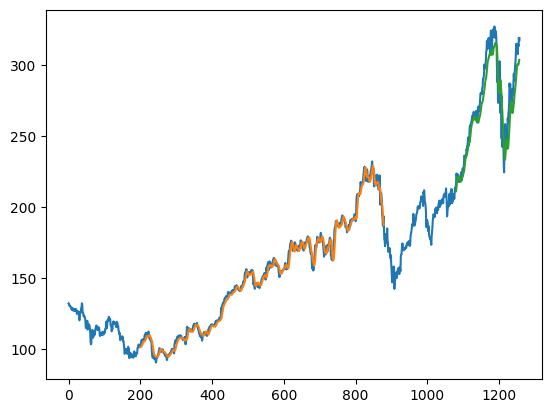

378


In [115]:
### Plotting 
# shift train predictions for plotting
print(len(test))
look_back=200
trainPredictPlot = numpy.empty_like(close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(close)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
print(len(test))

In [116]:
print(len(test))
n_steps=200
x_input=test[-n_steps:].reshape(1, -1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input
print(len(temp_input))

# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
i=0
days = 30
while(i<days):
    
    if(len(temp_input)>n_steps):
        print("i = ", str(i), "\n")
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        # print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        # print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        print(len(temp_input), "\n")
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print("i = ", str(i))
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input), "\n")
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)
lst_output = np.array(lst_output)

378
200
i =  0
[0.91478544]
201 

i =  1 

201 

i =  2 

201 

i =  3 

201 

i =  4 

201 

i =  5 

201 

i =  6 

201 

i =  7 

201 

i =  8 

201 

i =  9 

201 

i =  10 

201 

i =  11 

201 

i =  12 

201 

i =  13 

201 

i =  14 

201 

i =  15 

201 

i =  16 

201 

i =  17 

201 

i =  18 

201 

i =  19 

201 

i =  20 

201 

i =  21 

201 

i =  22 

201 

i =  23 

201 

i =  24 

201 

i =  25 

201 

i =  26 

201 

i =  27 

201 

i =  28 

201 

i =  29 

201 

[[0.9147854447364807], [0.911431610584259], [0.9024246335029602], [0.8915599584579468], [0.8806806206703186], [0.870441734790802], [0.8609780669212341], [0.8522403240203857], [0.8441253304481506], [0.8365191221237183], [0.8293090462684631], [0.8223897218704224], [0.8156662583351135], [0.8090559244155884], [0.8024911880493164], [0.7959179878234863], [0.7892965078353882], [0.7825990319252014], [0.7758081555366516], [0.768915057182312], [0.761917233467102], [0.7548165321350098], [0.7476181387901306], [0.74032

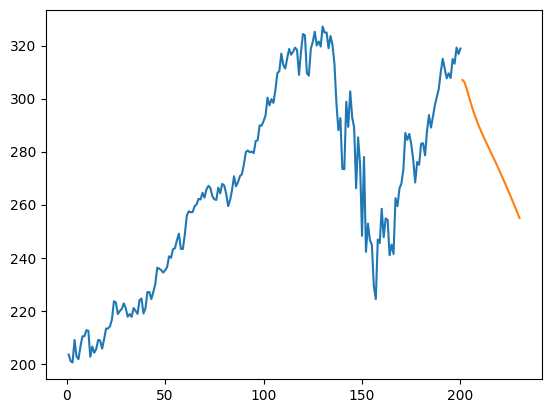

In [117]:
day_new=np.arange(1,n_steps+1)
day_pred=np.arange(n_steps+1,n_steps+1+days)
import matplotlib.pyplot as plt

plt.plot(day_new, scaler.inverse_transform(close[-n_steps:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))


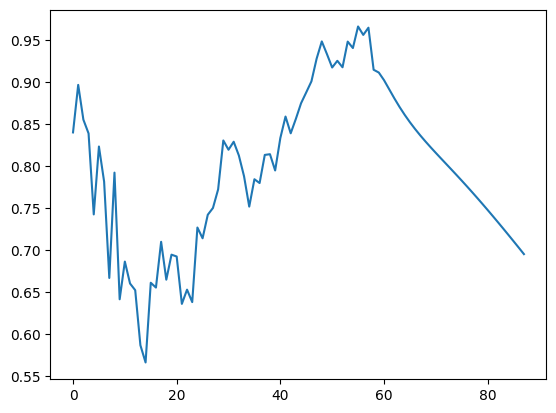

In [118]:
df3=close.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])


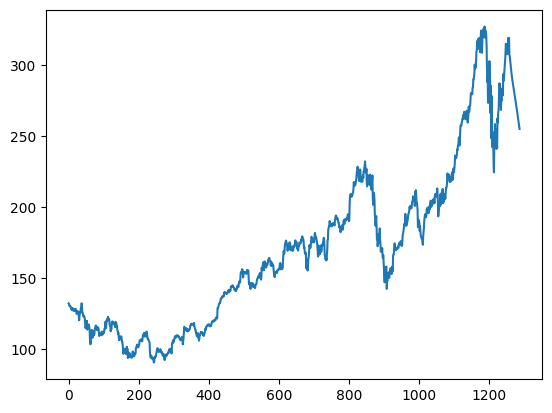

In [119]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

# Export to Flask

In [121]:
model.save("stock_price_prediction_model.h5")